In [1]:
# python
import os, sys, pickle
from itertools import combinations_with_replacement, combinations, product
from collections import OrderedDict
from typing import List

# stats
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from pandas.api.types import CategoricalDtype

# plot
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from matplotlib_venn import venn3

# analysis code
from lib.functions_scripting import *
from lib.functions_second_analysis import *

beauty_ratings = load_ratings(PATH_RATINGS)

In [2]:
_models = MODEL_NAMES
_studies = STUDY_NAMES
_datasets = DATASET_NAMES
_scales = SCALE_NAMES

In [ ]:
_models = MODEL_NAMES
_studies = "short presentation"
_datasets = "places1"
_scales = "scale4"

In [2]:
_models = NETS_ALL
_studies = STUDY_NAMES
_datasets = DATASET_NAMES
_scales = SCALE_NAMES

In [ ]:
# subselect models that have significant predictions at scale4
models_to_remove = set(
    ["edge_occlusion", "inpainting", "keypoints", "normal", "jigsaw"]
)
_models = list(set(MODEL_NAMES).difference(models_to_remove))

In [3]:
# unblocked data
_blocking = "unblocked"
_layers = slice(None)

dfi = load_integration(PATH_INTEGRATION)
dfibc = load_ibcorr(PATH_IBCORR)

dfi = dfi.sort_index().loc[(_models, _datasets, _scales, slice(None), _layers)]
dfibc = dfibc.sort_index().loc[(_models, _studies, _scales, _layers)]

In [3]:
# averaged data
_blocking = "average"
_layers = slice(None)

dfi = load_integration(PATH_INTEGRATION_AVERAGE)
dfibc = load_ibcorr(PATH_IBCORR_AVERAGE)

dfi = dfi.sort_index().loc[(_models, _datasets, _scales, slice(None), _layers)]
dfibc = dfibc.sort_index().loc[(_models, _studies, _scales, _layers)]

In [68]:
# maxpooled data
_blocking = "maxpool"
_layers = slice(None)

dfi = load_integration(PATH_INTEGRATION_MAXPOOL)
dfibc = load_ibcorr(PATH_IBCORR_MAXPOOL)

dfi = dfi.sort_index().loc[(_models, _datasets, _scales, slice(None), _layers)]
dfibc = dfibc.sort_index().loc[(_models, _studies, _scales, _layers)]

# Target: differences in ib-corr

absoloute difference in correlation in each layer, summed up. <br>
Optional: Normalized with 2 (spearman correlation range) * num_layers 

In [4]:
# ABSOLOUTE DIFFERENCES
target_rdm_absdiff = (
    (
        dfibc.unstack("model")
        .groupby(["study", "scale"])
        .apply(calculate_rdm, ctype="absdiff")
    )
    .droplevel(None)
    .droplevel(None, axis=1)
)

In [20]:
# target_rdm_absdiff.to_hdf(os.path.join(PATH_RESULTS, "compare predictions", "absoloute differences.h5"), key="target_rdm")
target_rdm_absdiff = pd.read_hdf(
    os.path.join(PATH_RESULTS, "compare predictions", "absoloute differences.h5"),
    key="target_rdm",
)

In [ ]:
# df = dfibc.unstack("layer")
# rdm_target_absdiff = pd.DataFrame(0, index=_models, columns=_models)

# for c1, c2 in combinations(_models, 2):
#     # sum of absoloute differences (easier, no correlation of correlated correlation coefficients)
#     rdm_target_absdiff.loc[c1, c2] = (df.loc[c1] - df.loc[c2]).abs().sum()
#     rdm_target_absdiff.loc[c2, c1] = (df.loc[c1] - df.loc[c2]).abs().sum()

# # norming dissimilarity: sum_abs_diff / (num_layers * 2)
# sns.heatmap(
#     rdm_target_absdiff,
#     xticklabels=rdm_target_absdiff.columns,
#     yticklabels=rdm_target_absdiff.index,
# )
# target_rdm = rdm_target_absdiff

In [ ]:
# CORRELATIONS
# # TODO: add correlate correlations
# # TODO check correct oder of models for this
# df = dfibc.unstack("layer")
# rdm_target_corrwise = pd.DataFrame(0, index=_models, columns=_models)

# for c1, c2 in combinations(_models, 2):
#     rdm_target_corrwise.loc[c1, c2] = pearsonr(df.loc[c1], df.loc[c2])[0]
#     rdm_target_corrwise.loc[c2, c1] = pearsonr(df.loc[c1], df.loc[c2])[0]

# # norming dissimilarity: sum_abs_diff / (num_layers * 2)
# sns.heatmap(
#     rdm_target_corrwise,
#     xticklabels=rdm_target_corrwise.columns,
#     yticklabels=rdm_target_corrwise.index,
# )
# target_rdm = rdm_target_corrwise

# load predictors

In [7]:
predictor_rdm_1 = pd.read_hdf(os.path.join(PATH_RESULTS, "sem_2d_3d", "predictor1 allnets.hd5"), key="predictor_rdm1")

In [8]:
predictor_rdm_2 = pd.read_hdf(os.path.join(PATH_RESULTS, "layer profile", "predictor2 maxpool.hd5"), key="predictor_rdm_2")

In [9]:
predictor_rdm_3 = pd.read_hdf(
    os.path.join(PATH_RESULTS, "spatial integration", "predictor3 bestpredlayer.hd5"),
    key="predictor_rdm_3",
)

# Predictors-Target analysis
do for each study and each scale, to check if there is some consistency in which factors always comes out on top



In [16]:
_blocking

In [13]:
predictor1 = predictor_rdm_1
predictor2 = predictor_rdm_2.loc[("places1", "scale4"),("places1", "scale4")]
predictor3 = predictor_rdm_3.loc[("short presentation","scale4")]
target = target_rdm_absdiff.loc[("short presentation", "scale4")]

In [65]:
predictor1 = predictor1.loc[NETS_ALL, NETS_ALL]
predictor2 = predictor2.loc[NETS_ALL, NETS_ALL]
predictor3 = predictor3.loc[NETS_ALL, NETS_ALL]
target = target.loc[NETS_ALL, NETS_ALL]

## predictor 1 - target

In [ ]:
# places1 scale4

In [15]:
correlate_rdms(predictor1, target)

(-0.1051837654276796, 0.09503828862852931)

In [14]:
correlate_rdms(predictor1.loc[NETS_ALL, NETS_ALL], target.loc[NETS_ALL, NETS_ALL])

(-0.29001848514913353, 0.002690861862071442)

In [68]:
predictors_r2([predictor1],target)

0.08411072172819833

In [17]:
predictors_r2(
    [predictor1.loc[NETS_ALL, NETS_ALL]],
    target.loc[NETS_ALL, NETS_ALL],
)

0.08411072172819833

## predictor2 - target

In [ ]:
# places1 scale4 maxpool

In [19]:
correlate_rdms(predictor2, target)

(-0.6677444638211117, 4.977027167376115e-34)

In [ ]:
predictors_r2([predictor2], target)

0.44588266896374373

In [214]:
f2 = factor2_rdm_bestlayer.loc[("short presentation", "scale4")]

In [228]:
correlate_rdms(t, f2)

(-0.5236855635420519, 3.2151495763391566e-19)

In [ ]:
for (name1, group1), (name2, group2) in zip(
    factor2_rdm_bestlayer.groupby(["study", "scale"]),
    target_rdm_absdiff.groupby(["study", "scale"]),
):
    print(name1 == name2)

In [237]:
predictors_r2(rdm2vec(f2), rdm2vec(t))

0.3648911015205908

## predictor 3 - target

In [ ]:
# places1 scale4

In [31]:
correlate_rdms(predictor3, target)

(-0.37464126075879833, 7.500535101774924e-10)

In [28]:
predictors_r2([predictor3], target)

0.14035607426294194

In [ ]:
plt.scatter(t, p3, s=10, color="magenta")

In [ ]:
sns.kdeplot(pd.DataFrame((t, p3)).T, x=0, y=1, fill=True, levels=100)
plt.scatter(t, p3, s=10, color="magenta")
plt.xlim(0, t.max())
plt.ylim(0, p1.max())

In [ ]:
plt.scatter(t.argsort(), p3.argsort(), s=10, color="magenta")

In [ ]:
sns.kdeplot(pd.DataFrame((t.argsort(), p3.argsort())).T, x=0, y=1, fill=True, levels=3)
plt.scatter(t.argsort(), p3.argsort(), s=10, color="magenta")
plt.xlim(0, t.size)
plt.ylim(0, t.size)

## variance partitioning

In [75]:
# unique variances
all = predictors_r2([predictor1, predictor2, predictor3], target)
r2p1 = all - predictors_r2([predictor2, predictor3], target)
r2p2 = all - predictors_r2([predictor1, predictor3], target)
r2p3 = all - predictors_r2([predictor1, predictor2], target)

r2p1, r2p2, r2p3

(0.0011797605593583116, 0.17348498319922756, 0.07125079172527427)

In [82]:
# shared variances
r2p1p2p3 = (
    predictors_r2([predictor1], target)
    + predictors_r2([predictor2], target)
    + predictors_r2([predictor3], target)
    - 2 * predictors_r2([predictor1, predictor2, predictor3], target)
    + r2p1
    + r2p2
    + r2p3
)
r2p1p2 = (
    predictors_r2([predictor1], target)
    + predictors_r2([predictor2], target)
    - predictors_r2([predictor1, predictor2], target)
    - r2p1p2p3
)
r2p2p3 = (
    predictors_r2([predictor2], target)
    + predictors_r2([predictor3], target)
    - predictors_r2([predictor2, predictor3], target)
    - r2p1p2p3
)
r2p1p3 = (
    predictors_r2([predictor1], target)
    + predictors_r2([predictor3], target)
    - predictors_r2([predictor1, predictor3], target)
    - r2p1p2p3
)
r2p1p2p3, r2p1p2, r2p2p3, r2p1p3

(0.03890997686763786,
 0.001885480354232305,
 0.28758901418415594,
 0.04213550394696974)

In [93]:
r2_tuple = tuple(round(r2, 2) for r2 in (r2p1, r2p2, r2p1p2, r2p3, r2p1p3, r2p2p3, r2p1p2p3))
r2_tuple

(0.0, 0.17, 0.0, 0.07, 0.04, 0.29, 0.04)

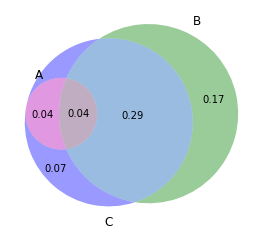

In [95]:

venn3(subsets=r2_tuple)
plt.gca().set_facecolor('white')

In [84]:
# plot full venn diagram (with 2 or 3 predictors)